# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   [Problem Identification](https://medium.com/@aiden.dataminer/the-data-science-method-problem-identification-6ffcda1e5152)

2.   [Data Wrangling](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-data-collection-organization-and-definitions-d19b6ff141c4) 
  * Data Collection 
   * Data Organization
  * Data Definition 
  * Data Cleaning
 
3.   [Exploratory Data Analysis](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-exploratory-data-analysis-bc84d4d8d3f9)
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

4.   [Pre-processing and Training Data Development](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-pre-processing-and-training-data-development-fd2d75182967)
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   [Modeling](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-modeling-56b4233cad1b)
  * Create dummy or indicator features for categorical variable
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   [**Documentation**](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-documentation-c92c28bd45e6)

  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

Here we are going to revisit many of the actions we took in the previous guided capstone steps. 

We start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory.

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
from sklearn import preprocessing, linear_model
from sklearn.metrics import explained_variance_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

print(os.getcwd())
print(os.listdir())

/Users/jb/Development/courses/springboard/ds/Assignments/6 Applying the Data Science Method/big-mountain-resort
['Notebook_Step4.ipynb', 'Notebook_Step6.ipynb', 'Notebook_Step2.ipynb', '.DS_Store', 'LICENSE', 'Notebook_Step5.ipynb', 'models', 'Notebook_Step3.ipynb', 'README.md', '.gitignore', 'figures', '.ipynb_checkpoints', '.git', 'data']


## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model we chose in step 5 on the training dataset. This includes: creating dummy features for states, scaling the data,and creating train and test splits before fitting the chosen model. Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [2]:
df_orig = pd.read_csv('data/step3_output.csv')
df_orig.head(5)


,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow_Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,Hilltop Ski Area,Alaska,2090,294,0,0.0,0,0,0,1,...,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,0
1,Sunrise Park Resort,Arizona,11100,1800,0,0.0,0,1,2,3,...,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0,1
2,Yosemite Ski & Snowboard Area,California,7800,600,0,0.0,0,0,0,1,...,88.0,100.0,110.0,84.0,300.0,47.0,47.0,107.0,0.0,1
3,Boreal Mountain Resort,California,7700,500,0,0.0,0,1,1,3,...,380.0,200.0,150.0,54.0,400.0,49.0,60.0,150.0,200.0,1
4,Dodge Ridge,California,8200,1600,0,0.0,0,0,1,2,...,862.0,100.0,114.0,69.0,350.0,78.0,78.0,140.0,0.0,1


In [3]:
df = df_orig.copy()
df = pd.concat([df.drop(['state'], axis=1), pd.get_dummies(df[['state']])], axis=1)
df.columns

Index(['Name', 'summit_elev', 'vertical_drop', 'trams', 'fastEight',
       'fastSixes', 'fastQuads', 'quad', 'triple', 'double', 'surface',
       'total_chairs', 'Runs', 'TerrainParks', 'LongestRun_mi',
       'SkiableTerrain_ac', 'Snow_Making_ac', 'daysOpenLastYear', 'yearsOpen',
       'averageSnowfall', 'AdultWeekday', 'AdultWeekend', 'projectedDaysOpen',
       'NightSkiing_ac', 'clusters', 'state_Alaska', 'state_Arizona',
       'state_California', 'state_Colorado', 'state_Connecticut',
       'state_Idaho', 'state_Illinois', 'state_Indiana', 'state_Iowa',
       'state_Maine', 'state_Maryland', 'state_Massachusetts',
       'state_Michigan', 'state_Minnesota', 'state_Missouri', 'state_Montana',
       'state_Nevada', 'state_New Hampshire', 'state_New Jersey',
       'state_New Mexico', 'state_New York', 'state_North Carolina',
       'state_Ohio', 'state_Oregon', 'state_Pennsylvania',
       'state_Rhode Island', 'state_South Dakota', 'state_Tennessee',
       'state_Utah', 'st

In [4]:
def standardize_features(x):
    # Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
    scaler = preprocessing.StandardScaler().fit(x)
    # Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
    X_scaled = scaler.transform(x)
    # return X_scaled
    return X_scaled, scaler

def split_data(x, y):
    # Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
    y = y.ravel()

    # Call the train_test_split() function with the first two parameters set to x and y 
    # Declare four variables, X_train, X_test, y_train and y_test separated by commas 
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
    return  X_train, X_test, y_train, y_test

def model_evaluate(y_test, y_pred):
    evs = explained_variance_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print('explained variance score: ', evs)
    print('mean absolute error: ', mae)
    return evs, mae

In [5]:
# Declare an explanatory variable, called X,and assign it the result of dropping 'Name' and 'AdultWeekend' from the df
X = df.drop(['Name','AdultWeekend'], axis=1)

# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
y = df.AdultWeekend

X_scaled, scaler = standardize_features(X)

X_train, X_test, y_train, y_test = split_data(X_scaled, y)

lm = linear_model.LinearRegression()


In [6]:
model = lm.fit(X_train, y_train)

# Make a variable called y_pred and assign it the result of calling predict() on our model variable with parameter X_test
y_pred = model.predict(X_test)

In [7]:
evs, mae = model_evaluate(y_test, y_pred)
print(model.intercept_)

explained variance score:  0.7756641343021198
mean absolute error:  6.145708594149419
56.2827138903714


## Review the results 

Now, let's predict the Big Mountain Weekend price with the model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Whitefish Mountain resort in our data using string contains or string matching.

In [8]:
bm = df[df.Name.str.contains('Whitefish Mountain Resort')]
bm

,Name,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,...,state_Rhode Island,state_South Dakota,state_Tennessee,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
171,Whitefish Mountain Resort,6817,2353,0,0.0,0,3,2,6,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df = df.drop(axis=0, index=171)

In [10]:
bm['AdultWeekend']

171    81.0
Name: AdultWeekend, dtype: float64

Prepare the Whitefish Mountain resort data row as we did in the model fitting stage.

In [11]:
bm_scaled = scaler.transform(bm.drop(['Name','AdultWeekend'], axis=1))


We predict the Whitefish Mountain resort `Adult Weekend` price and print it out. This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [12]:
res = lm.predict(bm_scaled)
print(res)

[83.26275539]


Print the Whitefish Mountain resort actual `Adult Weekend` price.

In [13]:
print('actual: ', bm['AdultWeekend'])
print()
bmp = bm.copy()
bmp['AdultWeekend'] = res[0]
print('predicted: ', bmp['AdultWeekend'])
predicted_AdultWeekend = bmp['AdultWeekend']

actual:  171    81.0
Name: AdultWeekend, dtype: float64

predicted:  171    83.262755
Name: AdultWeekend, dtype: float64


As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling

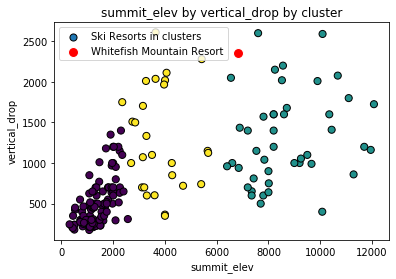

In [14]:

ax1 = plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], edgecolor='black', s=50, cmap='viridis', label ='clusters')
ax2 = plt.scatter(bm['summit_elev'], bm['vertical_drop'], edgecolor='white', c='red', s=100)
plt.legend((ax1, ax2), ('Ski Resorts in clusters', 'Whitefish Mountain Resort'))

plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.savefig('figures/AdultWeekend_fig1.png',bbox_inches='tight')

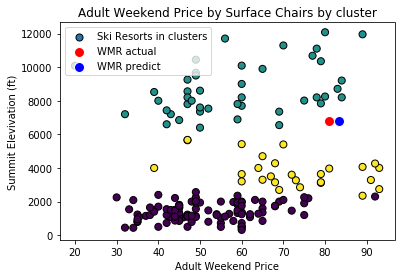

In [15]:
ax1 = plt.scatter(df['AdultWeekend'], df['summit_elev'], c=df['clusters'], edgecolor='black', s=50, cmap='viridis', label ='clusters')
ax2 = plt.scatter(bm['AdultWeekend'], bm['summit_elev'], edgecolor='white', c='red', s=100)
ax3 = plt.scatter(bmp['AdultWeekend'], bmp['summit_elev'], edgecolor='white', c='blue', s=100)
plt.legend((ax1, ax2, ax3), ('Ski Resorts in clusters', 'WMR actual', 'WMR predict'))
plt.xlabel('Adult Weekend Price')
plt.ylabel('Summit Elevivation (ft)')
plt.title('Adult Weekend Price by Surface Chairs by cluster')
plt.savefig('figures/AdultWeekend_fig2.png',bbox_inches='tight')

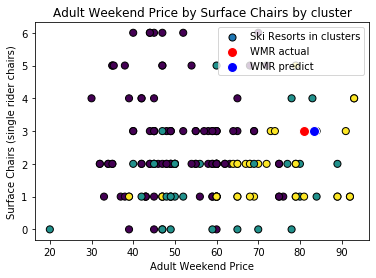

In [16]:

ax1 = plt.scatter(df['AdultWeekend'], df['surface'], c=df['clusters'], edgecolor='black', s=50, cmap='viridis', label ='clusters')
ax2 = plt.scatter(bm['AdultWeekend'], bm['surface'], edgecolor='white', c='red', s=100)
ax3 = plt.scatter(bmp['AdultWeekend'], bmp['surface'], edgecolor='white', c='blue', s=100)
plt.legend((ax1, ax2, ax3), ('Ski Resorts in clusters', 'WMR actual', 'WMR predict'))
plt.xlabel('Adult Weekend Price')
plt.ylabel('Surface Chairs (single rider chairs)')
plt.title('Adult Weekend Price by Surface Chairs by cluster')
plt.savefig('figures/AdultWeekend_fig3.png',bbox_inches='tight')

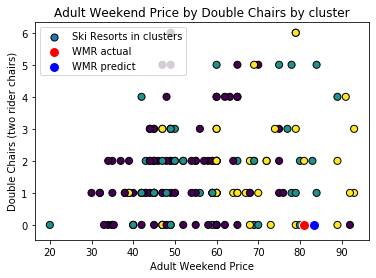

In [17]:
ax1 = plt.scatter(df['AdultWeekend'], df['double'], c=df['clusters'], edgecolor='black', s=50, cmap='viridis', label ='clusters')
ax2 = plt.scatter(bm['AdultWeekend'], bm['double'], edgecolor='white', c='red', s=100)
ax3 = plt.scatter(bmp['AdultWeekend'], bmp['double'], edgecolor='white', c='blue', s=100)
plt.legend((ax1, ax2, ax3), ('Ski Resorts in clusters', 'WMR actual', 'WMR predict'))
plt.xlabel('Adult Weekend Price')
plt.ylabel('Double Chairs (two rider chairs)')
plt.title('Adult Weekend Price by Double Chairs by cluster')
plt.savefig('figures/AdultWeekend_fig4.png',bbox_inches='tight')

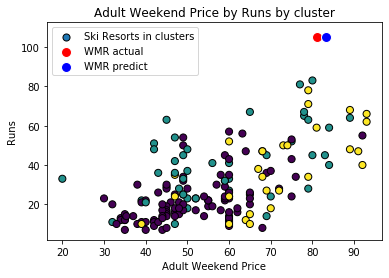

In [18]:
ax1 = plt.scatter(df['AdultWeekend'], df['Runs'], c=df['clusters'], edgecolor='black', s=50, cmap='viridis', label ='clusters')
ax2 = plt.scatter(bm['AdultWeekend'], bm['Runs'], edgecolor='white', c='red', s=100)
ax3 = plt.scatter(bmp['AdultWeekend'], bmp['Runs'], edgecolor='white', c='blue', s=100)
plt.legend((ax1, ax2, ax3), ('Ski Resorts in clusters', 'WMR actual', 'WMR predict'))

plt.xlabel('Adult Weekend Price')
plt.ylabel('Runs')
plt.title('Adult Weekend Price by Runs by cluster')
plt.savefig('figures/AdultWeekend_fig5.png',bbox_inches='tight')

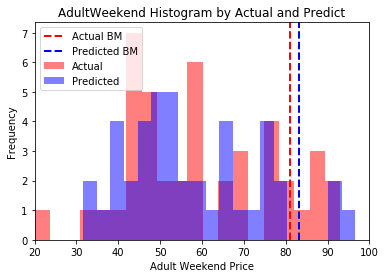

In [19]:
plt.hist(y_test, bins = 20, color='red', alpha = 0.5,label='Actual')
plt.hist(y_pred, bins = 20, color='blue', alpha = 0.5, label='Predicted')
plt.xlim(20,100)
plt.axvline(np.array(bm.AdultWeekend), color='red', linewidth=2, linestyle = '--', label = "Actual BM")
plt.axvline(np.array(bmp.AdultWeekend), color='blue', linewidth=2, linestyle = '--', label = "Predicted BM")
plt.legend()
plt.xlabel('Adult Weekend Price')
plt.ylabel('Frequency')
plt.title('AdultWeekend Histogram by Actual and Predict')
plt.savefig('figures/AdultWeekend_fig6.png',bbox_inches='tight')

## Finalize Code

We save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. 

In [20]:
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, 'models/regression_model_adultweekend.joblib') 

['models/regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model in a csv. 

In [21]:
# Model coefficients and performance metrics as a DataFrame
model_metrics_df = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])
model_metrics_df['Feature'] = X.columns
model_metrics_df['MAE'] = mae
model_metrics_df['ExplainedVariance'] = evs

In [22]:
# Save model metrics as a csv
model_metrics_df.to_csv('data/model_metrics_adultweekend.csv', index=False)

## Build model to predict `AdultWeekday`

In [23]:
# Start fresh 
df = df_orig.copy()

# Make dummy `state_`s and drop `state`
df = pd.concat([df.drop(['state'], axis=1), pd.get_dummies(df[['state']])], axis=1)

# Declare an explanatory variable, called X,and assign it the result of dropping 'Name' and 'AdultWeekend' from the df
X = df.drop(['Name','AdultWeekday'], axis=1)

# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
y = df.AdultWeekday

# Standardize
X_scaled, scaler = standardize_features(X)

# Split into test and train
X_train, X_test, y_train, y_test = split_data(X_scaled, y)

# Train model
model = lm.fit(X_train, y_train)

# Make a variable called y_pred and assign it the result of calling predict() on our model variable with parameter X_test
y_pred = model.predict(X_test)

evs, mae = model_evaluate(y_test, y_pred)
print(model.intercept_)

explained variance score:  0.7422556758180926
mean absolute error:  6.896908113250268
49.222820694797726


## Build predict `AdultWeekday`

In [24]:
bm = df[df.Name.str.contains('Whitefish Mountain Resort')]
bm[['AdultWeekend','AdultWeekday']]

,AdultWeekend,AdultWeekday
171,81.0,81.0


In [25]:
df = df.drop(axis=0, index=171)
bm['AdultWeekday']

171    81.0
Name: AdultWeekday, dtype: float64

In [26]:
bm_scaled = scaler.transform(bm.drop(['Name','AdultWeekday'], axis=1))
res = lm.predict(bm_scaled)
print(res)

[80.79703944]


In [27]:
print('actual: ', bm['AdultWeekday'])
print()
bmp = bm.copy()
bmp['AdultWeekday'] = res[0]
print('predicted: ', bmp['AdultWeekday'])
predicted_AdultWeekday = bmp['AdultWeekday']


actual:  171    81.0
Name: AdultWeekday, dtype: float64

predicted:  171    80.797039
Name: AdultWeekday, dtype: float64


In [28]:
print('Mean Actual Weekend/Weekday Ratio:', (df_orig.AdultWeekend / df_orig.AdultWeekday).mean())
print('Predicted Weekend/Weekday Difference: ', (predicted_AdultWeekend.values - predicted_AdultWeekday.values)[0])

Mean Actual Weekend/Weekday Ratio: 1.1960716629578005
Predicted Weekend/Weekday Difference:  2.465715949479929


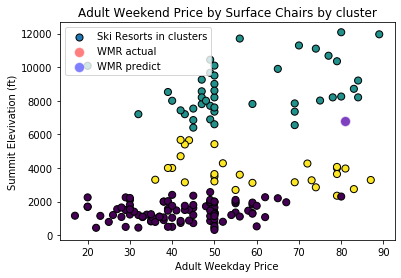

In [29]:
ax1 = plt.scatter(df['AdultWeekday'], df['summit_elev'], c=df['clusters'], edgecolor='black', s=50, cmap='viridis', label ='clusters')
ax2 = plt.scatter(bm['AdultWeekday'], bm['summit_elev'], edgecolor='white', alpha='.5', c='red', s=100)
ax3 = plt.scatter(bmp['AdultWeekday'], bmp['summit_elev'], edgecolor='white', alpha='.5', c='blue', s=100)
plt.legend((ax1, ax2, ax3), ('Ski Resorts in clusters', 'WMR actual', 'WMR predict'))
plt.xlabel('Adult Weekday Price')
plt.ylabel('Summit Elevivation (ft)')
plt.title('Adult Weekend Price by Surface Chairs by cluster')
plt.savefig('figures/AdultWeekday_fig1',bbox_inches='tight')

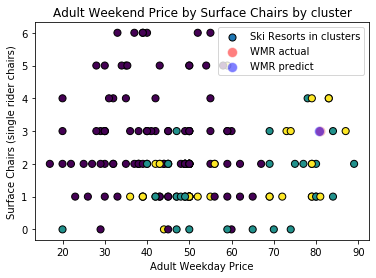

In [30]:
ax1 = plt.scatter(df['AdultWeekday'], df['surface'], c=df['clusters'], edgecolor='black', s=50, cmap='viridis', label ='clusters')
ax2 = plt.scatter(bm['AdultWeekday'], bm['surface'], edgecolor='white', alpha='.5', c='red', s=100)
ax3 = plt.scatter(bmp['AdultWeekday'], bmp['surface'], edgecolor='white', alpha='.5', c='blue', s=100)
plt.legend((ax1, ax2, ax3), ('Ski Resorts in clusters', 'WMR actual', 'WMR predict'))
plt.xlabel('Adult Weekday Price')
plt.ylabel('Surface Chairs (single rider chairs)')
plt.title('Adult Weekend Price by Surface Chairs by cluster')
plt.savefig('figures/AdultWeekday_fig2.png',bbox_inches='tight')

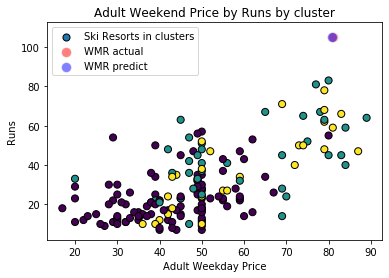

In [31]:
ax1 = plt.scatter(df['AdultWeekday'], df['Runs'], c=df['clusters'], edgecolor='black', s=50, cmap='viridis', label ='clusters')
ax2 = plt.scatter(bm['AdultWeekday'], bm['Runs'], edgecolor='white', alpha=.5, c='red', s=100)
ax3 = plt.scatter(bmp['AdultWeekday'], bmp['Runs'], edgecolor='white', alpha=.5, c='blue', s=100)
plt.legend((ax1, ax2, ax3), ('Ski Resorts in clusters', 'WMR actual', 'WMR predict'))

plt.xlabel('Adult Weekday Price')
plt.ylabel('Runs')
plt.title('Adult Weekend Price by Runs by cluster')
plt.savefig('figures/AdultWeekday_fig3.png',bbox_inches='tight')

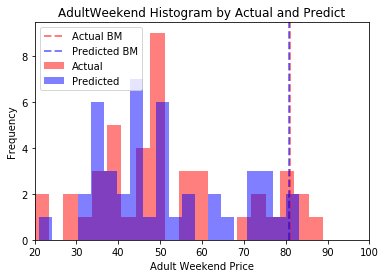

In [32]:
plt.hist(y_test, bins = 20, color='red', alpha = 0.5,label='Actual')
plt.hist(y_pred, bins = 20, color='blue', alpha = 0.5, label='Predicted')
plt.xlim(20,100)
plt.axvline(np.array(bm.AdultWeekday), color='red', linewidth=2, alpha=.5, linestyle = '--', label = "Actual BM")
plt.axvline(np.array(bmp.AdultWeekday), color='blue', linewidth=2, alpha=.5, linestyle = '--', label = "Predicted BM")
plt.legend()
plt.xlabel('Adult Weekend Price')
plt.ylabel('Frequency')
plt.title('AdultWeekend Histogram by Actual and Predict')
plt.savefig('figures/AdultWeekday_fig4.png',bbox_inches='tight')

### Pickle model and Model coefficients and performance metrics as a CSV 

In [33]:
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, 'models/regression_model_adultweekday.joblib') 

['models/regression_model_adultweekday.joblib']

In [34]:
# Model coefficients and performance metrics as a DataFrame
model_metrics_df = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])
model_metrics_df['Feature'] = X.columns
model_metrics_df['MAE'] = mae
model_metrics_df['ExplainedVariance'] = evs
# Save model metrics as a csv
model_metrics_df.to_csv('data/model_metrics_adultweekday.csv', index=False)

## Build model to predict `projectedDaysOpen`

In [35]:
# Start fresh 
df = df_orig.copy()

# Declare an explanatory variable, called X,and assign it the result of dropping 'Name' and 'AdultWeekend' from the df
X = df.drop(['Name', 'projectedDaysOpen', 'state'], axis=1)

# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
y = df.projectedDaysOpen

# Standardize
X_scaled, scaler = standardize_features(X)

# Split into test and train
X_train, X_test, y_train, y_test = split_data(X_scaled, y)

# Train model
model = lm.fit(X_train, y_train)

# Make a variable called y_pred and assign it the result of calling predict() on our model variable with parameter X_test
y_pred = model.predict(X_test)

evs, mae = model_evaluate(y_test, y_pred)
print(model.intercept_)

explained variance score:  0.4172462552656919
mean absolute error:  11.864796873312795
112.48208365948472


## Predict `projectedDaysOpen`

In [36]:
bm = df[df.Name.str.contains('Whitefish Mountain Resort')]
bm

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow_Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
171,Whitefish Mountain Resort,Montana,6817,2353,0,0.0,0,3,2,6,...,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0,1


In [37]:
df = df.drop(axis=0, index=171)
bm['projectedDaysOpen']

171    123.0
Name: projectedDaysOpen, dtype: float64

In [38]:
bm_scaled = scaler.transform(bm.drop(['Name','projectedDaysOpen', 'state'], axis=1))
res = lm.predict(bm_scaled)
print(res)

[129.78462413]


In [39]:
print('actual: ', bm['projectedDaysOpen'])
print()
bmp = bm.copy()
bmp['projectedDaysOpen'] = res[0]
print('predicted: ', bmp['projectedDaysOpen'])


actual:  171    123.0
Name: projectedDaysOpen, dtype: float64

predicted:  171    129.784624
Name: projectedDaysOpen, dtype: float64


In [40]:
 res[0] - bm['projectedDaysOpen'].values[0]

6.784624127694855

In [41]:
100*(1 - (bm['projectedDaysOpen'].values[0]/bmp['projectedDaysOpen'].values[0]))

5.227602401513664

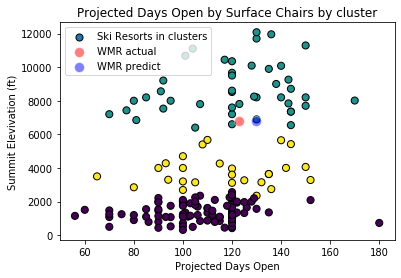

In [42]:
ax1 = plt.scatter(df['projectedDaysOpen'], df['summit_elev'], c=df['clusters'], edgecolor='black', s=50, cmap='viridis', label ='clusters')
ax2 = plt.scatter(bm['projectedDaysOpen'], bm['summit_elev'], edgecolor='white', alpha='.5', c='red', s=100)
ax3 = plt.scatter(bmp['projectedDaysOpen'], bmp['summit_elev'], edgecolor='white', alpha='.5', c='blue', s=100)
plt.legend((ax1, ax2, ax3), ('Ski Resorts in clusters', 'WMR actual', 'WMR predict'))
plt.xlabel('Projected Days Open')
plt.ylabel('Summit Elevivation (ft)')
plt.title('Projected Days Open by Surface Chairs by cluster')
plt.savefig('figures/projectedDaysOpen_fig1',bbox_inches='tight')

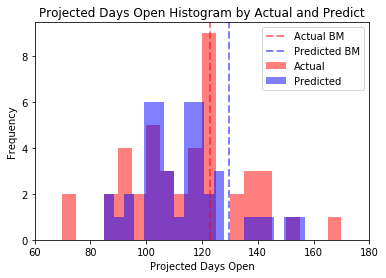

In [43]:
plt.hist(y_test, bins = 20, color='red', alpha = 0.5,label='Actual')
plt.hist(y_pred, bins = 20, color='blue', alpha = 0.5, label='Predicted')
plt.xlim(60,180)
plt.axvline(np.array(bm.projectedDaysOpen), color='red', linewidth=2, alpha=.5, linestyle = '--', label = "Actual BM")
plt.axvline(np.array(bmp.projectedDaysOpen), color='blue', linewidth=2, alpha=.5, linestyle = '--', label = "Predicted BM")
plt.legend()
plt.xlabel('Projected Days Open')
plt.ylabel('Frequency')
plt.title('Projected Days Open Histogram by Actual and Predict')
plt.savefig('figures/projectedDaysOpen_fig2.png',bbox_inches='tight')

#### projectedDaysOpen is an extra 7 days which is 5.23% more season 

### Pickle model and Model coefficients and performance metrics as a CSV 

In [44]:
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, 'models/regression_model_projectedDaysOpen.joblib') 

['models/regression_model_projectedDaysOpen.joblib']

In [45]:
# Model coefficients and performance metrics as a DataFrame
model_metrics_df = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])
model_metrics_df['Feature'] = X.columns
model_metrics_df['MAE'] = mae
model_metrics_df['ExplainedVariance'] = evs
# Save model metrics as a csv
model_metrics_df.to_csv('data/model_metrics_projectedDaysOpen.csv', index=False)